In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(X_train[10].shape)

(28, 28)


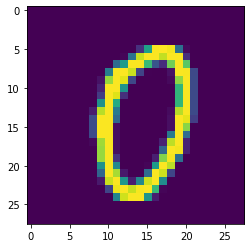

0


In [7]:
plt.imshow(X_train[1000])
plt.show()

print(Y_train[1000])

In [8]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [9]:
print(np.unique(Y_train))

print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [13]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3526 - accuracy: 0.8996 - val_loss: 0.1984 - val_accuracy: 0.9415
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1605 - accuracy: 0.9528 - val_loss: 0.1412 - val_accuracy: 0.9575
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1203 - accuracy: 0.9639 - val_loss: 0.1365 - val_accuracy: 0.9584
Epoch 4/10
938/938 [==============================] - 5s 6ms/step - loss: 0.0975 - accuracy: 0.9706 - val_loss: 0.1156 - val_accuracy: 0.9662
Epoch 5/10
938/938 [==============================] - 8s 8ms/step - loss: 0.0813 - accuracy: 0.9752 - val_loss: 0.1154 - val_accuracy: 0.9679
Epoch 6/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0696 - accuracy: 0.9789 - val_loss: 0.1149 - val_accuracy: 0.9672
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0609 - accuracy: 0.9809 - val_loss: 0.1077 - val_accuracy: 0.9691
Epoch 

In [15]:
print(X_test.shape)

(10000, 28, 28)


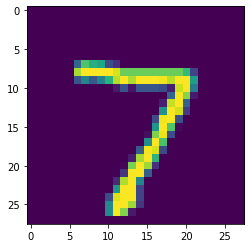

In [16]:
plt.imshow(X_test[0])
plt.show()

In [17]:
print(Y_test[0])

7


In [18]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [19]:
print(Y_pred.shape)

(10000, 10)


In [20]:
print(Y_pred[0])

[1.0532056e-03 1.6216367e-01 8.7912661e-01 9.7434062e-01 1.1534609e-04
 3.1539565e-01 4.7030437e-07 9.9999768e-01 4.4355041e-01 1.1141443e-01]


In [21]:
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [22]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [23]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [24]:
print(conf_mat)

tf.Tensor(
[[ 962    1    1    2    0    7    5    1    1    0]
 [   0 1123    2    0    0    3    1    0    5    1]
 [   1    2 1012    3    2    1    1    6    4    0]
 [   0    0   10  963    0   23    0    4    7    3]
 [   0    2    3    1  945    2    6    1    2   20]
 [   1    0    0    6    2  877    2    1    2    1]
 [   3    3    4    0    4   17  925    0    2    0]
 [   1    4   11    5    0    1    0 1003    1    2]
 [   2    0    8    7    4   15    1    8  928    1]
 [   4    6    1    7    7    9    1   10    4  960]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

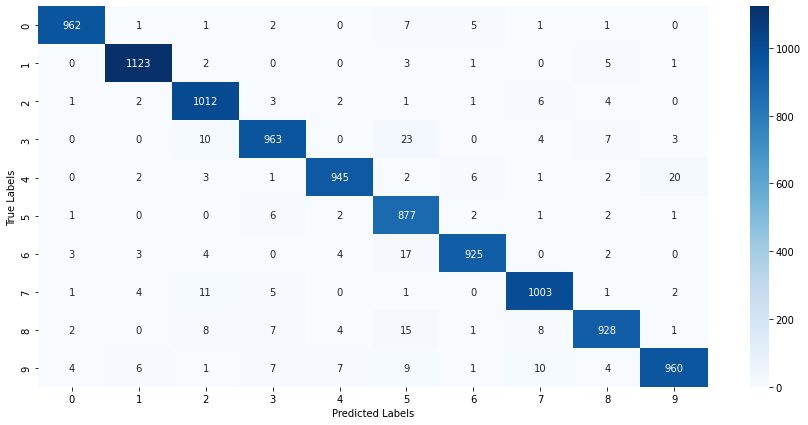

In [25]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [26]:

import numpy as np
import itertools
p_test=model.predict(X_test).argmax(axis=1)

313/313 [==============================] - 0s 1ms/step


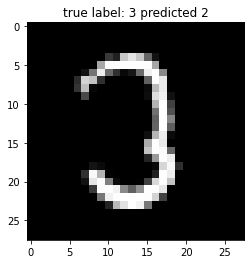

In [27]:
misclassified_idx=np.where(p_test != Y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(X_test[i],cmap='gray')
plt.title("true label: %s predicted %s" % (Y_test[i],p_test[i]));

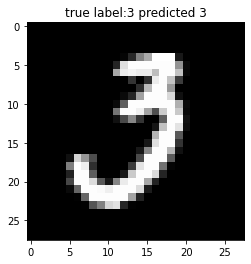

In [28]:
correctly_classified=np.where(p_test == Y_test)[0]
j=np.random.choice(correctly_classified)
plt.imshow(X_test[j],cmap='gray')
plt.title("true label:%s predicted %s" % (Y_test[j],p_test[j]));

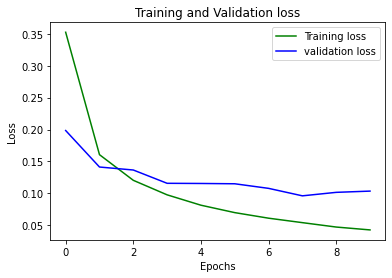

In [29]:
loss_train = r.history['loss']
loss_val = r.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

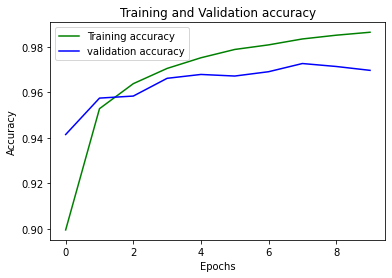

In [30]:
TrainAcc = r.history['accuracy']
valAcc = r.history['val_accuracy']
plt.plot(TrainAcc, 'g', label='Training accuracy')
plt.plot(valAcc, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


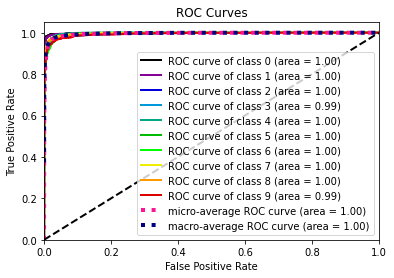

In [36]:
#!pip install scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = Y_test
y_probas = Y_pred
skplt.metrics.plot_roc_curve(y_true, y_probas)
plt.show()